In [9]:
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
color = sns.color_palette()

import nltk
from scipy import sparse

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

from os import system


In [2]:
train_text = 'training_text'
train_var = 'training_variants'

dfv = pd.read_csv(train_var)
dft = pd.read_csv(train_text, sep = '\|\|', engine = 'python', skiprows = 1, names = ['ID', 'Text'] )

In [3]:
df = pd.merge(dfv, dft, how = 'inner', on = 'ID')

In [4]:
y = df[['ID', 'Class']]
x = df[['ID', 'Text']]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size =0.25)

In [5]:
text = list(x_train.Text)

vectorizer = TfidfVectorizer(stop_words = 'english', ngram_range=(1,3))
doc_vectors = vectorizer.fit_transform(text)
classes = np.array(y_train.Class)
test_vector = vectorizer.transform(x_test.Text)

# Audio notification when vectorizing is done
system("say done vectorizing")

In [6]:
doc_vec = vectorizer.transform(text)

In [200]:
#df_all = pd.DataFrame(doc_vec.toarray(), columns = vectorizer.get_feature_names())

In [ ]:
df_all.describe()

0

In [10]:
# Multinomial Naive Bayes
model = MultinomialNB().fit(doc_vectors, classes)
predictions = model.predict(test_vector)

testing_NB = pd.merge(x_test, y_test, on='ID').dropna(how='all')
predict_NB = pd.concat([testing_NB, pd.Series(predictions)], axis = 1)
predict_NB.columns = ['ID', 'Text', 'Class', 'Predicted']
accuracy_NB = len(list(predict_NB[predict_NB.Class == predict_NB.Predicted].Class))/len(list(predict_NB.Class))
print(accuracy_NB)

0.5114320096269555


In [11]:
print(classification_report(y_test.Class, predict_NB))

TypeError: '>' not supported between instances of 'int' and 'str'

In [10]:
# Support Vector Classifier
model = LinearSVC().fit(doc_vectors, classes)
predictions = model.predict(test_vector)

testing_SVC = pd.merge(x_test, y_test, on='ID').dropna(how='all')
predict_SVC = pd.concat([testing_SVC, pd.Series(predictions)], axis = 1)
predict_SVC.columns = ['ID', 'Text', 'Class', 'Predicted']
accuracy_SVC = len(list(predict_SVC[predict_SVC.Class == predict_SVC.Predicted].Class))/len(list(predict_SVC.Class))
print(accuracy_SVC)

0.6389891696750902


In [11]:
# Support Vector Classifier, return probability
model = SVC(kernel = 'linear', probability = True).fit(doc_vectors, classes)
predictions = model.predict_proba(test_vector)

testing_SVC1 = pd.merge(x_test, y_test, on='ID').dropna(how='all')
SVC1predictions = pd.DataFrame(predictions)
predict_SVC1 = pd.merge(testing_SVC1.reset_index(), SVC1predictions.reset_index(), on ='index')
predict_SVC1.columns = ['ID', 'Text', 'Class', 'Predicted', 1, 2, 3, 4, 5, 6, 7, 8, 9]


In [19]:
# Random Forest Classifier
model_RF = RandomForestClassifier(n_estimators = 100, max_features = 'sqrt', n_jobs=-1, class_weight= 'balanced').fit(doc_vectors, classes)
predictions_RF = model_RF.predict(test_vector)

testing_RF = pd.merge(x_test, y_test, on='ID').dropna(how='all')
predict_RF = pd.concat([testing_RF, pd.Series(predictions_RF)], axis = 1)
predict_RF.columns = ['ID', 'Text', 'Class', 'Predicted']
accuracy_RF = len(list(predict_RF[predict_RF.Class == predict_RF.Predicted].Class))/len(list(predict_RF.Class))

print(accuracy_RF)

0.6245487364620939


In [140]:
#Logistic Regression
model_log = LogisticRegression().fit(doc_vectors, classes)
predictions_log = model_log.predict(test_vector)

testing_log = pd.merge(x_test, y_test, on='ID').dropna(how='all')
predict_log = pd.concat([testing_log, pd.Series(predictions_log)], axis = 1)
predict_log.columns = ['ID', 'Text', 'Class', 'Predicted']
accuracy_log = len(list(predict_log[predict_log.Class == predict_log.Predicted].Class))/len(list(predict_log.Class))
print(accuracy_log)

0.614921780986763


In [27]:
feature_importances = pd.DataFrame(model_RF.feature_importances_)

decisionpath = model_RF.decision_path(test_vector)
decisions = pd.DataFrame(decisionpath[0].toarray())

In [28]:
# Check some out-of-the-box accuracies
print('Naive Bayes Accuracy: %r' %accuracy_NB)
print('Support Vector Accuracy: %r' %accuracy_SVC)
print('Random Forest Accuracy: %r' %accuracy_RF)

Naive Bayes Accuracy: 0.5246690734055355
Support Vector Accuracy: 0.6389891696750902
Random Forest Accuracy: 0.6245487364620939


In [15]:
NB_CM = confusion_matrix(predict_NB.Class, predict_NB.Predicted)
    
NB_CM

array([[ 54,   0,   0,  26,   1,   0,  62,   0,   0],
       [  2,   7,   0,   1,   0,   0,  93,   0,   0],
       [  0,   0,   0,   8,   3,   0,  15,   0,   0],
       [ 16,   0,   0, 103,   2,   1,  69,   0,   0],
       [ 17,   0,   0,   8,   7,   2,  16,   0,   0],
       [ 10,   0,   0,   5,   0,  23,  17,   0,   0],
       [  1,   0,   0,   1,   0,   0, 242,   0,   0],
       [  0,   0,   0,   0,   0,   0,   6,   0,   0],
       [  0,   0,   0,   0,   0,   0,  13,   0,   0]])

/home/ubuntu/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


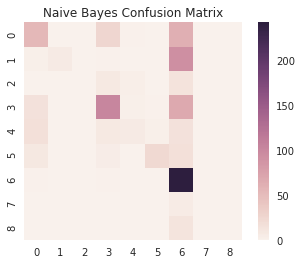

In [21]:
ax1 = sns.heatmap(NB_CM, square = True)
ax1.set_title('Naive Bayes Confusion Matrix')

In [22]:
SVC_CM = confusion_matrix(predict_SVC.Class, predict_SVC.Predicted)
SVC_CM

array([[ 86,   2,   0,  31,  13,   2,   8,   1,   0],
       [  7,  45,   0,   1,   2,   2,  46,   0,   0],
       [  0,   0,   8,   6,   3,   0,   9,   0,   0],
       [ 33,   1,   3, 126,  16,   2,   9,   0,   1],
       [ 15,   1,   1,   5,  19,   4,   5,   0,   0],
       [ 15,   1,   1,   0,   2,  31,   5,   0,   0],
       [  4,  22,   6,   2,   5,   1, 204,   0,   0],
       [  1,   1,   0,   0,   0,   0,   3,   1,   0],
       [  0,   0,   0,   1,   0,   0,   1,   0,  11]])

/home/ubuntu/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


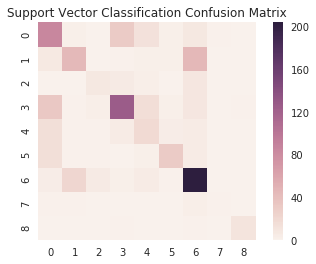

In [23]:
ax2 = sns.heatmap(SVC_CM, square = True)
ax2.set_title('Support Vector Classification Confusion Matrix')


In [20]:
RF_CM = confusion_matrix(predict_RF.Class, predict_RF.Predicted)
    
RF_CM

array([[ 71,   0,   2,  22,  23,   9,  16,   0,   0],
       [  9,  46,   0,   0,   3,   0,  44,   1,   0],
       [  0,   0,  13,   5,   4,   0,   4,   0,   0],
       [ 32,   0,   5, 125,  10,   0,  19,   0,   0],
       [  8,   1,   2,   7,  22,   4,   6,   0,   0],
       [  4,   1,   1,   1,   4,  38,   6,   0,   0],
       [  7,  21,  13,   3,   6,   0, 193,   0,   1],
       [  0,   0,   0,   0,   0,   0,   6,   0,   0],
       [  0,   0,   0,   2,   0,   0,   0,   0,  11]])

/home/ubuntu/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


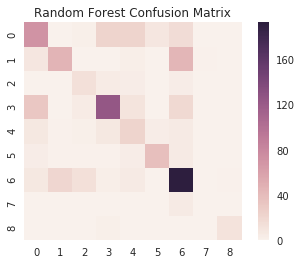

In [24]:
ax3 = sns.heatmap(RF_CM, square = True)
ax3.set_title('Random Forest Confusion Matrix')

/home/ubuntu/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


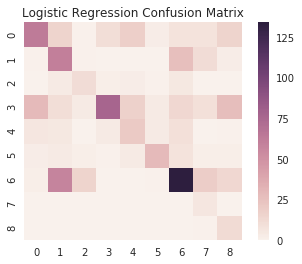

In [143]:
log_CM = confusion_matrix(predict_log.Class, predict_log.Predicted)
ax2 = sns.heatmap(log2_CM, square = True)
ax2.set_title('Logistic Regression Confusion Matrix')


# Preparing condensed DataFrame

In [7]:
df1 = df[df.Class == 1]
x1 = ''
for i, row in df1.iterrows():
    x1 += str(row['Text']) + " "


In [8]:
df2 = df[df.Class == 2]
x2 = ''
for i, row in df2.iterrows():
    x2 += str(row['Text']) + " "


In [9]:
df3 = df[df.Class == 3]
x3 = ''
for i, row in df3.iterrows():
    x3 += str(row['Text']) + " "


In [10]:
df4 = df[df.Class == 4]
x4 = ''
for i, row in df4.iterrows():
    x4 += str(row['Text']) + " "


In [11]:
df5 = df[df.Class == 5]
x5 = ''
for i, row in df5.iterrows():
    x5+= str(row['Text']) + " "


In [12]:
df6 = df[df.Class == 6]
x6 = ''
for i, row in df6.iterrows():
    x6 += str(row['Text']) + " "


In [13]:
df7 = df[df.Class == 7]
x7 = ''
for i, row in df7.iterrows():
    x7 += str(row['Text']) + " "


In [14]:
df8 = df[df.Class == 8]
x8 = ''
for i, row in df8.iterrows():
    x8 += str(row['Text']) + " "


In [15]:
df9 = df[df.Class == 9]
x9 = ''
for i, row in df9.iterrows():
    x9 += str(row['Text']) + " "


In [16]:
df_condense =pd.DataFrame({1:x1, 
                          2:x2, 
                          3:x3, 
                          4:x4, 
                          5:x5, 
                          6:x6,
                          7:x7,
                          8:x8,
                          9:x9
                          }, index = (range(1)))
df_con = df_condense.transpose()


In [17]:
df_con['Class'] = pd.Series(range(10))
df_con.columns=['Text', 'Class']

In [18]:
df_con

,Text,Class
1,qCyclin-dependent kinases (CDKs) regulate a va...,1
2,Abstract Background Non-small cell lung canc...,2
3,Recent evidence has demonstrated that acquired...,3
4,Oncogenic mutations in the monomeric Casitas B...,4
5,Oncogenic mutations in the monomeric Casitas B...,5
6,Abstract Background Non-small cell lung canc...,6
7,Sequencing studies have identified many recurr...,7
8,The RNA maturation is an important and complex...,8
9,The RNA maturation is an important and complex...,9


In [19]:
x_con = df_con['Text']
y_con = df_con['Class']

In [20]:
vectorizer = TfidfVectorizer(stop_words = 'english', ngram_range=(1,3))
doc_vec_con = vectorizer.fit_transform(x_con)
classes_con = np.array(y_con)

In [112]:
# Multinomial Naive Bayes
model_NB2 = MultinomialNB().fit(doc_vec_con, classes_con)
predictions_NB2 = model_NB2.predict()

testing_NB2 = pd.merge(x_test, y_test, on='ID').dropna(how='all')
predict_NB2 = pd.concat([testing_NB2, pd.Series(predictions_NB2)], axis = 1)
predict_NB2.columns = ['ID', 'Text', 'Class', 'Predicted']
accuracy_NB2 = len(list(predict_NB2[predict_NB2.Class == predict_NB2.Predicted].Class))/len(list(predict_NB2.Class))
print(accuracy_NB2)

0.5836341756919374


In [114]:
# Support Vector Classifier
model_SVC2 = LinearSVC().fit(doc_vec_con, classes_con)
predictions_SVC2 = model_SVC2.predict(vectorizer.transform(x_test.Text))

testing_SVC2 = pd.merge(x_test, y_test, on='ID').dropna(how='all')
predict_SVC2 = pd.concat([testing_SVC2, pd.Series(predictions_SVC2)], axis = 1)
predict_SVC2.columns = ['ID', 'Text', 'Class', 'Predicted']
accuracy_SVC2 = len(list(predict_SVC2[predict_SVC2.Class == predict_SVC2.Predicted].Class))/len(list(predict_SVC2.Class))
print(accuracy_SVC2)

0.4584837545126354


In [136]:
#Logistic Regression
model_log2 = LogisticRegression().fit(doc_vec_con, classes_con)
predictions_log2 = model_log2.predict(vectorizer.transform(x_test.Text))

testing_log2 = pd.merge(x_test, y_test, on='ID').dropna(how='all')
predict_log2 = pd.concat([testing_log2, pd.Series(predictions_log2)], axis = 1)
predict_log2.columns = ['ID', 'Text', 'Class', 'Predicted']
accuracy_log2 = len(list(predict_log2[predict_log2.Class == predict_log2.Predicted].Class))/len(list(predict_log2.Class))
print(accuracy_log2)

0.4981949458483754


/home/ubuntu/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


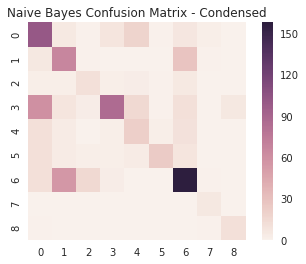

In [125]:
NB2_CM = confusion_matrix(predict_NB2.Class, predict_NB2.Predicted)
ax2 = sns.heatmap(NB2_CM, square = True)
ax2.set_title('Naive Bayes Confusion Matrix - Condensed')


/home/ubuntu/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


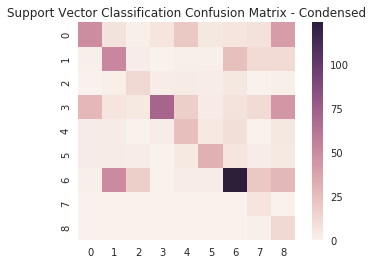

In [123]:
SVC2_CM = confusion_matrix(predict_SVC2.Class, predict_SVC2.Predicted)
ax2 = sns.heatmap(SVC2_CM, square = True)
ax2.set_title('Support Vector Classification Confusion Matrix - Condensed')


/home/ubuntu/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


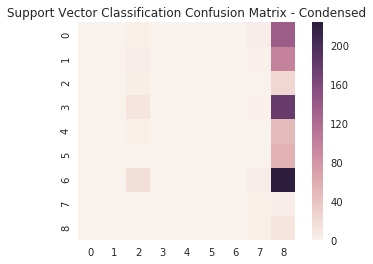

In [124]:
RF2_CM = confusion_matrix(predict_RF2.Class, predict_RF2.Predicted)
ax2 = sns.heatmap(RF2_CM, square = True)
ax2.set_title('Support Vector Classification Confusion Matrix - Condensed')


/home/ubuntu/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


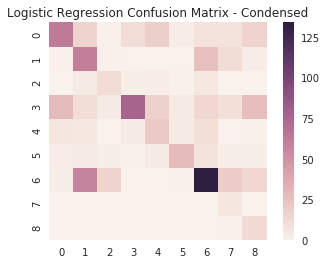

In [142]:
log2_CM = confusion_matrix(predict_log2.Class, predict_log2.Predicted)
ax2 = sns.heatmap(log2_CM, square = True)
ax2.set_title('Logistic Regression Confusion Matrix - Condensed')


# GridsearchCV

In [119]:
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

from imblearn.under_sampling import NearMiss
from imblearn.pipeline import make_pipeline
from imblearn.metrics import classification_report_imbalanced

In [36]:

rfc = RandomForestClassifier(n_jobs=-1, oob_score = False)

param_grid = {
    'n_estimators': [10, 15],
    'max_features': ['auto', 'sqrt', 'log2']
}

CV_rfc = GridSearchCV(estimator = rfc, param_grid = param_grid, cv=3)
CV_rfc.fit(doc_vectors, classes)
print(CV_rfc.best_params_)


{'max_features': 'auto', 'n_estimators': 15}


In [8]:
rfc = RandomForestClassifier(n_jobs=-1, warm_start = False, class_weight = 'balanced')

param_grid = {
    'n_estimators': [10, 30],
    'max_features': ['auto', 'sqrt', 'log2']
}

CV_rfc = GridSearchCV(estimator = rfc, param_grid = param_grid, cv=3)
CV_rfc.fit(doc_vectors, classes)
print(CV_rfc.best_params_)

{'max_features': 'auto', 'n_estimators': 30}


In [9]:
rfc = RandomForestClassifier(n_jobs=-1, warm_start = False, class_weight='balanced')

param_grid = {
    'n_estimators': [30, 100],
    'max_features': ['auto', 'sqrt', 'log2']
}

CV_rfc = GridSearchCV(estimator = rfc, param_grid = param_grid, cv=3)
CV_rfc.fit(doc_vectors, classes)
print(CV_rfc.best_params_)

{'max_features': 'sqrt', 'n_estimators': 100}


In [ ]:
svc = SVC(degree = 9, probability = True, class_weight = 'balanced')

param_grid_svc = {
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid', 'precomputed']
}
CV_svc = GridsearchCV(estimator = svc, param_grid = param_grid_svc, cv =3)
CV_svc.fit(doc_vectors, classes)
print(CV_rfc.best_params_)


# SMOTE

In [12]:
from sklearn.datasets import make_classification
from sklearn.decomposition import PCA

from imblearn.combine import SMOTEENN, SMOTETomek

from imblearn.over_sampling import SMOTE
from imblearn.pipeline import make_pipeline
from imblearn.metrics import classification_report_imbalanced

from scipy.sparse import csr_matrix

In [13]:
'''pipeline = make_pipeline(SMOTEENN(n_jobs =-1), SMOTETomek(n_jobs=-1))
pipeline.fit_transform(doc_vec_con, classes_con)

# Classify and report the results
print(classification_report_imbalanced(vectorizer.transform(x_test.Text), pipeline.predict(doc_vec_con)))'''

'pipeline = make_pipeline(SMOTEENN(n_jobs =-1), SMOTETomek(n_jobs=-1))\npipeline.fit_transform(doc_vec_con, classes_con)\n\n# Classify and report the results\nprint(classification_report_imbalanced(vectorizer.transform(x_test.Text), pipeline.predict(doc_vec_con)))'

In [14]:
doc_vectors_dense = doc_vectors.toarray()

In [ ]:
sm = SMOTE(n_jobs=-1)
model_sm = sm.fit_sample(doc_vectors_dense, classes)

In [15]:
system("say done condensing")

0

# Bootstrapping - Over sampling

In [211]:
df.Class.value_counts()

7    953
4    686
1    568
2    452
6    275
5    242
3     89
9     37
8     19
Name: Class, dtype: int64

In [204]:
# Over sample - base is Class 7
df_boot_over = df7.reset_index(drop=True)

index1 = np.arange(0, df1.shape[0])
index2 = np.arange(0, df2.shape[0])
index3 = np.arange(0, df3.shape[0])
index4 = np.arange(0, df4.shape[0])
index5 = np.arange(0, df5.shape[0])
index6 = np.arange(0, df6.shape[0])
### df7
index8 = np.arange(0, df8.shape[0])
index9 = np.arange(0, df9.shape[0])


temp_index1 = np.random.choice(index1, size =df7.shape[0])
temp_index2 = np.random.choice(index2, size =df7.shape[0])
temp_index3 = np.random.choice(index3, size =df7.shape[0])
temp_index4 = np.random.choice(index4, size =df7.shape[0])
temp_index5 = np.random.choice(index5, size =df7.shape[0])
temp_index6 = np.random.choice(index6, size =df7.shape[0])
### df7
temp_index8 = np.random.choice(index8, size =df7.shape[0])
temp_index9 = np.random.choice(index9, size =df7.shape[0])


df_boot_over = df_boot_over.append(df1.iloc[temp_index1])
df_boot_over = df_boot_over.append(df2.iloc[temp_index2])
df_boot_over = df_boot_over.append(df3.iloc[temp_index3])
df_boot_over = df_boot_over.append(df4.iloc[temp_index4])
df_boot_over = df_boot_over.append(df5.iloc[temp_index5])
df_boot_over = df_boot_over.append(df6.iloc[temp_index6])
### df7
df_boot_over = df_boot_over.append(df8.iloc[temp_index8])
df_boot_over = df_boot_over.append(df9.iloc[temp_index9])

df_boot_over.reset_index(drop=True)
x_train_boot_over = df_boot_over.drop('Class', axis=1)
y_train_boot_over = df_boot_over.Class

In [207]:
text_BO = list(x_train_boot_over.Text)

vectorizer = TfidfVectorizer(stop_words = 'english', ngram_range=(1,3))
doc_vectors_BO = vectorizer.fit_transform(text_BO)
classes_BO = np.array(y_train_boot_over)
test_vector = vectorizer.transform(x_test.Text)

In [209]:
# Multinomial Naive Bayes
model_NB_BO = MultinomialNB().fit(doc_vectors_BO, classes_BO)
predictions_NB_BO = model_NB_BO.predict(test_vector)

testing_NB_BO = pd.merge(x_test, y_test, on='ID').dropna(how='all')
predict_NB_BO = pd.concat([testing_NB_BO, pd.Series(predictions_NB_BO)], axis = 1)
predict_NB_BO.columns = ['ID', 'Text', 'Class', 'Predicted']
accuracy_NB_BO = len(list(predict_NB_BO[predict_NB_BO.Class == predict_NB_BO.Predicted].Class))/len(list(predict_NB_BO.Class))
print(accuracy_NB_BO)

0.7063778580024067


In [230]:
print(classification_report(y_test.Class, predictions_NB_BO))

             precision    recall  f1-score   support

          1       0.79      0.62      0.70       143
          2       0.70      0.72      0.71       103
          3       0.32      0.88      0.47        26
          4       0.89      0.69      0.78       191
          5       0.38      0.66      0.48        50
          6       0.78      0.73      0.75        55
          7       0.85      0.73      0.78       244
          8       0.22      1.00      0.36         6
          9       0.65      1.00      0.79        13

avg / total       0.77      0.71      0.73       831



In [210]:
#Logistic Regression
model_logBO = LogisticRegression().fit(doc_vectors_BO, classes_BO)
predictions_logBO = model_logBO.predict(test_vector)

testing_logBO = pd.merge(x_test, y_test, on='ID').dropna(how='all')
predict_logBO = pd.concat([testing_logBO, pd.Series(predictions_logBO)], axis = 1)
predict_logBO.columns = ['ID', 'Text', 'Class', 'Predicted']
accuracy_logBO = len(list(predict_logBO[predict_logBO.Class == predict_logBO.Predicted].Class))/len(list(predict_logBO.Class))
print(accuracy_logBO)

0.7653429602888087


In [233]:
print(classification_report(y_test.Class, predictions_logBO))

             precision    recall  f1-score   support

          1       0.76      0.71      0.74       143
          2       0.76      0.76      0.76       103
          3       0.42      0.88      0.57        26
          4       0.89      0.73      0.80       191
          5       0.46      0.76      0.57        50
          6       0.81      0.80      0.81        55
          7       0.87      0.79      0.83       244
          8       0.75      1.00      0.86         6
          9       0.81      1.00      0.90        13

avg / total       0.80      0.77      0.77       831



In [219]:
# Support Vector Classifier
model_SVC_BO = LinearSVC().fit(doc_vectors_BO, classes_BO)


In [224]:
predictions_SVC_BO = model_SVC_BO.predict(test_vector)

testing_SVC_BO = pd.merge(x_test, y_test, on='ID').dropna(how='all')
predict_SVC_BO = pd.concat([testing_SVC_BO, pd.Series(predictions_SVC_BO)], axis = 1)
predict_SVC_BO.columns = ['ID', 'Text', 'Class', 'Predicted']
accuracy_SVC_BO = len(list(predict_SVC_BO[predict_SVC_BO.Class == predict_SVC_BO.Predicted].Class))/len(list(predict_SVC_BO.Class))
print(accuracy_SVC_BO)

ValueError: X has 1039423 features per sample; expecting 7985672

In [225]:
# Random Forest Classifier
model_RF_BO = RandomForestClassifier(n_estimators = 100, max_features = 'sqrt', n_jobs=-1, class_weight= 'balanced').fit(doc_vectors_BO, classes_BO)


In [226]:
predictions_RF_BO = model_RF_BO.predict(test_vector)

testing_RF_BO = pd.merge(x_test, y_test, on='ID').dropna(how='all')
predict_RF_BO = pd.concat([testing_RF_BO, pd.Series(predictions_RF_BO)], axis = 1)
predict_RF_BO.columns = ['ID', 'Text', 'Class', 'Predicted']
accuracy_RF_BO = len(list(predict_RF_BO[predict_RF_BO.Class == predict_RF_BO.Predicted].Class))/len(list(predict_RF_BO.Class))

print(accuracy_RF_BO)

ValueError: Number of features of the model must match the input. Model n_features is 7985672 and input n_features is 1039423 

/home/ubuntu/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/ubuntu/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/ubuntu/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/ubuntu/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/ubuntu/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: fin

/home/ubuntu/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/ubuntu/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/ubuntu/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/ubuntu/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/ubuntu/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: fin

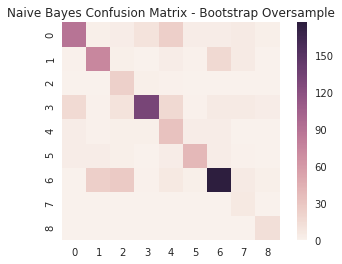

In [231]:
NB_BO_CM = confusion_matrix(predict_NB_BO.Class, predict_NB_BO.Predicted)
ax2 = sns.heatmap(NB_BO_CM, square = True)
ax2.set_title('Naive Bayes Confusion Matrix - Bootstrap Oversample')


/home/ubuntu/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/ubuntu/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/ubuntu/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/ubuntu/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/ubuntu/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: fin

/home/ubuntu/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/ubuntu/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/ubuntu/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/ubuntu/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/ubuntu/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: fin

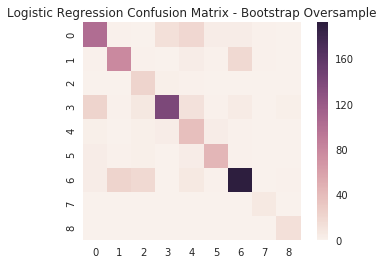

In [232]:
logBO = confusion_matrix(predict_logBO.Class, predict_logBO.Predicted)
ax2 = sns.heatmap(logBO, square = True)
ax2.set_title('Logistic Regression Confusion Matrix - Bootstrap Oversample')


In [214]:
# Under sample - base is Class 8
df_boot_under = df8.reset_index(drop=True)

index1 = np.arange(0, df1.shape[0])
index2 = np.arange(0, df2.shape[0])
index3 = np.arange(0, df3.shape[0])
index4 = np.arange(0, df4.shape[0])
index5 = np.arange(0, df5.shape[0])
index6 = np.arange(0, df6.shape[0])
index7 = np.arange(0, df7.shape[0])
###df8
index9 = np.arange(0, df9.shape[0])


temp_index1u = np.random.choice(index1, size =df8.shape[0])
temp_index2u = np.random.choice(index2, size =df8.shape[0])
temp_index3u = np.random.choice(index3, size =df8.shape[0])
temp_index4u = np.random.choice(index4, size =df8.shape[0])
temp_index5u = np.random.choice(index5, size =df8.shape[0])
temp_index6u = np.random.choice(index6, size =df8.shape[0])
temp_index7u = np.random.choice(index7, size =df8.shape[0])
###df8
temp_index9u = np.random.choice(index9, size =df8.shape[0])


df_boot_under = df_boot_under.append(df1.iloc[temp_index1u])
df_boot_under = df_boot_under.append(df2.iloc[temp_index2u])
df_boot_under = df_boot_under.append(df3.iloc[temp_index3u])
df_boot_under = df_boot_under.append(df4.iloc[temp_index4u])
df_boot_under = df_boot_under.append(df5.iloc[temp_index5u])
df_boot_under = df_boot_under.append(df6.iloc[temp_index6u])
df_boot_under = df_boot_under.append(df7.iloc[temp_index7u])
###df8
df_boot_under = df_boot_under.append(df9.iloc[temp_index9u])

df_boot_under.reset_index(drop=True)
x_train_boot_under = df_boot_under.drop('Class', axis=1)
y_train_boot_under = df_boot_under.Class

In [215]:
text_BU = list(x_train_boot_under.Text)

vectorizer = TfidfVectorizer(stop_words = 'english', ngram_range=(1,3))
doc_vectors_BU = vectorizer.fit_transform(text_BU)
classes_BU = np.array(y_train_boot_under)
test_vector = vectorizer.transform(x_test.Text)

In [216]:
# Multinomial Naive Bayes
model_NB_BU = MultinomialNB().fit(doc_vectors_BU, classes_BU)
predictions_NB_BU = model_NB_BU.predict(test_vector)

testing_NB_BU = pd.merge(x_test, y_test, on='ID').dropna(how='all')
predict_NB_BU = pd.concat([testing_NB_BU, pd.Series(predictions_NB_BU)], axis = 1)
predict_NB_BU.columns = ['ID', 'Text', 'Class', 'Predicted']
accuracy_NB_BU = len(list(predict_NB_BU[predict_NB_BU.Class == predict_NB_BU.Predicted].Class))/len(list(predict_NB_BU.Class))
print(accuracy_NB_BU)

0.3694344163658243


In [217]:
#Logistic Regression
model_logBU = LogisticRegression().fit(doc_vectors_BU, classes_BU)
predictions_logBU = model_logBU.predict(test_vector)

testing_logBU = pd.merge(x_test, y_test, on='ID').dropna(how='all')
predict_logBU = pd.concat([testing_logBU, pd.Series(predictions_logBU)], axis = 1)
predict_logBU.columns = ['ID', 'Text', 'Class', 'Predicted']
accuracy_logBU = len(list(predict_logBU[predict_logBU.Class == predict_logBU.Predicted].Class))/len(list(predict_logBU.Class))
print(accuracy_logBU)

0.4139590854392298


# Test Section


In [73]:
df_small = df[:200]

ysmall = df_small[['ID', 'Class']]
xsmall = df_small[['ID', 'Text']]
xsmall_train, xsmall_test, ysmall_train, ysmall_test = train_test_split(xsmall, ysmall, test_size =0.25)

In [74]:
textsmall = list(xsmall_train.Text)

vectorizer = TfidfVectorizer(stop_words = 'english', ngram_range=(1,3))
doc_vectors_small = vectorizer.fit_transform(textsmall)
classes_small = np.array(ysmall_train.Class)
test_vector_small = vectorizer.transform(xsmall_test.Text)


In [84]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import cross_val_score


In [80]:
clf = DecisionTreeClassifier(random_state=None)
model_clf = clf.fit(doc_vectors, classes)

In [86]:
#vectorizer.get_feature_names()

In [87]:
export_graphviz(model_clf, out_file = 'tree1.dot', feature_names=doc_vectors)
!dot -Tpng tree1.dot -o tree1.png

IndexError: index (3865675) out of range

In [77]:
features = feature_importances[0].sort_values(ascending=False).head(15000)
features = features.reset_index()
features.columns = ['feature_id', 'importance']
featurelist = list(features.feature_id)
featuredf = pd.DataFrame(doc_vectors.toarray())

feature_names = pd.DataFrame(vectorizer.get_feature_names())
selected_feature_names = feature_names.transpose()[featurelist]

AttributeError: 'numpy.float64' object has no attribute 'sort_values'